In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [2]:
#这里chaosss表示使用最后20步的平均距离，而chaos也是，但是忘记对混沌度归一化了，检查发现混沌度不归一化相对残差会很小，但是意外的效果很好，不知道为啥

In [3]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'f': """
    [0.06265878897644761, 0.10976724154718713, 0.09861106943657459, 0.06072176428499674, 0.13097316743147214, 0.6529650280744944, 0.7137587673002206, 0.6764896634761238, 0.18288571533607834, 0.12237723116550325]
    Error u of fuhe active learning(LHS sampling): 2.811208e-01
    [0.0358180229201927, 0.05585966593141555, 0.057468795166968616, 0.03393991953036893, 0.0766683877644389, 0.3625437882391885, 0.4031235496664109, 0.37765864852734254, 0.1114171397223775, 0.06272457185165352]
    MAE of fuhe active learning(LHS sampling): 1.577222e-01
    [0.0019588549618540186, 0.006011512967294769, 0.004851651804996078, 0.0018396154588122232, 0.008558604313964702, 0.21272480320911183, 0.2541798967318647, 0.22832875965336086, 0.016687752803359542, 0.007472045933228773]
    MSE of fuhe active learning(LHS sampling): 7.426135e-02
    """,
    # 'd': """
    # [0.3846828237599971, 0.4057673295513748, 0.09533352721650631, 0.06663706810023058, 0.05538250599499043, 0.0726402619532176, 0.13716993778606365, 0.13480670251570098, 0.07390132414841973, 0.24215416134840095]
    # Error u of fuhe active learning(LHS sampling): 1.668476e-01
    # [0.03971781600666478, 0.041700095207111126, 0.005928855252858696, 0.0038480007956718746, 0.0028901093662905076, 0.003814606265706635, 0.007809145907613248, 0.007991813874921509, 0.004081169564046871, 0.016833163743412278]
    # MAE of fuhe active learning(LHS sampling): 1.346148e-02
    # [0.0558495479792267, 0.06213956739094921, 0.0034300890504194016, 0.001675891249254928, 0.0011576020260240382, 0.0019914475616785486, 0.007101203446260152, 0.006858624761946201, 0.0020611923027134354, 0.022130842386279003]
    # MSE of fuhe active learning(LHS sampling): 1.643960e-02
    # """,
    # 'dd': """
    # [0.036312318894378935, 0.2961812646203898, 0.0934615553033133, 0.42943369451542984, 0.05600847821650149, 0.2822919254291629, 0.0068700809080372745, 0.002333519093938641, 0.3373623908499726, 0.3287382628447124]
    # Error u of fuhe active learning(LHS sampling): 1.868993e-01
    # [0.0027196317050738263, 0.024341689368582022, 0.004851856274749346, 0.04719734004844059, 0.003284063950765183, 0.022513248015113337, 0.0010510745869465662, 0.00046911624031005105, 0.029054760955203585, 0.028711337289073408]
    # MAE of fuhe active learning(LHS sampling): 1.641941e-02
    # [0.0004976477436286188, 0.033107717292010494, 0.0032967049456180835, 0.06959952994649514, 0.001183917983395741, 0.030075370331421967, 1.7813029013822053e-05, 2.055118125062805e-06, 0.042954374919069865, 0.04078632575809751]
    # MSE of fuhe active learning(LHS sampling): 2.215215e-02
    # """,
    # 'pd': """
    # [0.020182642396985372, 0.2626868666290376, 0.07394612270101478, 0.3439371473932192, 0.0052082457966957105, 0.04774470651131973, 0.5072807738660671, 0.32445878639333964, 0.0834995338680386, 0.043481862896349935]
    # Error u of fuhe active learning(LHS sampling): 1.712427e-01
    # [0.0012396135519932882, 0.019463142406719314, 0.004243282392985698, 0.032370960340807976, 0.0003627263965198811, 0.0025069590571177355, 0.06405387841528207, 0.02967918207308838, 0.0045795371304895565, 0.002358569294432202]
    # MAE of fuhe active learning(LHS sampling): 1.608579e-02
    # [0.00015373406910276693, 0.026042986887137756, 0.0020636920256982645, 0.04464493979811096, 1.0237573102604629e-05, 0.0008603289318577404, 0.09712049276820883, 0.039731334339735, 0.0026313715446657747, 0.0007135597694186118]
    # MSE of fuhe active learning(LHS sampling): 2.139727e-02
    # """,
    # 'qf+r+c': """
    # [0.0024771764343731063, 0.0048000342695453556, 0.002703518910665728, 0.005841471610315474, 0.0018433419316947542, 0.0019390163043488382, 0.0017595717382733614, 0.0024797759628009002, 0.0014783335735052726, 0.001401926851427393]
    # Error u of fuhe active learning(LHS sampling): 2.672417e-03
    # [0.00041290430533344024, 0.0006884685392972895, 0.0005251188791774388, 0.001572628682710307, 0.0003233916506616035, 0.0006211754490918562, 0.0005451668213997481, 0.00046156759938133744, 0.00037007050383825677, 0.0005317655240660335]
    # MAE of fuhe active learning(LHS sampling): 6.052258e-04
    # [2.315943454645556e-06, 8.695663951320436e-06, 2.75849940949375e-06, 1.2878302217731222e-05, 1.2824069901346807e-06, 1.4189823503238834e-06, 1.168498145705158e-06, 2.320806668764929e-06, 8.248195609039247e-07, 7.417623396246443e-07]
    # MSE of fuhe active learning(LHS sampling): 3.440569e-06
    # """,
    'f+wqf+r': """
    [0.7620395265729384, 0.7013330020400423, 0.10249810790850045, 0.06721624845663311, 0.059849574306991074, 1.094732299600943, 0.7920641349931004, 0.7109326824979173, 0.6898852311272584, 0.7160248057451216]
    Error u of fuhe active learning(LHS sampling): 5.696576e-01
    [0.435698130286637, 0.3928897328369974, 0.05427282396700194, 0.038451997567754734, 0.029935740827384337, 0.6665089417623925, 0.4585867731490909, 0.398513131931809, 0.38684287719184474, 0.4028244781331054]
    MAE of fuhe active learning(LHS sampling): 3.264525e-01
    [0.2897298785080109, 0.24540693899615537, 0.005241673724880743, 0.0022541708338071754, 0.001787147585433265, 0.597935241775702, 0.31301055644849746, 0.25217106160133773, 0.2374608307304201, 0.2557963973090399]
    MSE of fuhe active learning(LHS sampling): 2.200794e-01
    """,
    # 'd+wqf+r': """
    # [0.003073302149325749, 0.039239424356502205, 0.2213950281003931, 0.002981114148995712, 0.00787924623918835, 0.00441538389814451, 0.010847296677020021, 0.00975958893167497, 0.05440257836244726, 0.31237022204949066]
    # Error u of fuhe active learning(LHS sampling): 6.663632e-02
    # [0.001070679093102269, 0.0035829840629446096, 0.01562857197647025, 0.00046447876772296066, 0.0014223083432804318, 0.0010248884798188342, 0.0028422184072856914, 0.000989969550661963, 0.004200682048370314, 0.02915199978798082]
    # MAE of fuhe active learning(LHS sampling): 6.037878e-03
    # [3.5647131745516904e-06, 0.0005811113087437917, 0.018499065884003615, 3.354063522528247e-06, 2.3430600436228133e-05, 7.357851373057327e-06, 4.44075801856015e-05, 3.594819786672292e-05, 0.001116999653072308, 0.036825896180113074]
    # MSE of fuhe active learning(LHS sampling): 5.714114e-03
    # """,
    # 'dd+wqf+r': """
    # [0.011639230315272586, 0.008739998447011503, 0.0031182968246693814, 0.28883622521731306, 0.011658850903294046, 0.16722405469329638, 0.006026256362881305, 0.659037184443721, 0.007932863194549297, 0.08895709700571856]
    # Error u of fuhe active learning(LHS sampling): 1.253170e-01
    # [0.001102485030271382, 0.0009551369410666387, 0.0005569445758305879, 0.024174442214027595, 0.0021103625095766883, 0.011319226502274215, 0.0009592033116308517, 0.1317490364420326, 0.0011083373586132216, 0.0059948368859685155]
    # MAE of fuhe active learning(LHS sampling): 1.800300e-02
    # [5.112844634514106e-05, 2.8829478255972017e-05, 3.669855605517023e-06, 0.031485992888959445, 5.130096904488166e-05, 0.010553865885593714, 1.3705954253535006e-05, 0.16392074162385356, 2.3750568057139225e-05, 0.0029865877233763603]
    # MSE of fuhe active learning(LHS sampling): 2.091196e-02
    # """,
    # 'pd+wqf+r': """
    # [0.01487975816076764, 0.004425147116743381, 0.010574108555368734, 0.22709678946406597, 0.020701436545781913, 0.019417850968012143, 0.0077100090827258334, 0.020900760934280137, 0.015687836904105336, 0.0016830492230150448]
    # Error u of fuhe active learning(LHS sampling): 3.430767e-02
    # [0.002501183786816907, 0.0005434639375414548, 0.002125591600945597, 0.055775278025791124, 0.003041072538431163, 0.0018689604687829814, 0.0010587622169099594, 0.0020815562619556347, 0.0022139316375456497, 0.0005320335767621574]
    # MAE of fuhe active learning(LHS sampling): 7.174183e-03
    # [8.356142110447676e-05, 7.390426449028627e-06, 4.219894574123838e-05, 0.019464177699755524, 0.00016173910639201536, 0.00014230376774501753, 2.243488517968507e-05, 0.00016486872044663706, 9.288384885203617e-05, 1.0690738513779014e-06]
    # MSE of fuhe active learning(LHS sampling): 2.018263e-03
    # """,


    'f+qf': """
    [1.2307905923548237, 0.7856626689366795, 0.16772942327763604, 0.5452987548554559, 0.05607255841213851, 1.3488763879302121, 0.4149489237485858, 0.6680997480383929, 0.6426673144036853, 0.044700743013642734]
    Error u of fuhe active learning(LHS sampling): 5.904847e-01
    [0.7087100349489281, 0.4528895524096479, 0.1005434045385732, 0.2541834834949924, 0.032692583880322784, 0.7589300134700523, 0.22504678465885594, 0.36554076059793655, 0.3608424953493993, 0.0260866799776284]
    MAE of fuhe active learning(LHS sampling): 3.285466e-01
    [0.7557995400200299, 0.307971496349841, 0.014036434216062075, 0.14835674604578578, 0.001568696874553461, 0.9077841424803708, 0.08590680597475148, 0.22270035183403392, 0.20606807416283918, 0.000996937130125767]
    MSE of fuhe active learning(LHS sampling): 2.651189e-01
    """,
    # 'd+qf': """
    # [0.00469301907158501, 0.36877776212129354, 0.008300666550841001, 0.21915524561142471, 0.2329187145894202, 0.01042906754980788, 0.5865273365067676, 0.05056978841057446, 0.04168276511597679, 0.03167467841408275]
    # Error u of fuhe active learning(LHS sampling): 1.554729e-01
    # [0.0012233450545575113, 0.10068076044624145, 0.003209650107243257, 0.054851393667364384, 0.05799655320706228, 0.002102998927345151, 0.2158530155486196, 0.01705652296639066, 0.005781376015316897, 0.005692420689720146]
    # MAE of fuhe active learning(LHS sampling): 4.644480e-02
    # [8.312252171204167e-06, 0.05132672107087416, 2.6003991047872604e-05, 0.01812666097928299, 0.02047494959255969, 4.1049231667318554e-05, 0.1298346430694103, 0.0009651533998226177, 0.0006557331114525573, 0.0003786504701591552]
    # MSE of fuhe active learning(LHS sampling): 2.218379e-02
    # """,
    # 'dd+qf': """
    # [0.014633766600839149, 0.41278397253174653, 0.004431646027365364, 0.019972502042698365, 0.23609441030531855, 0.004963555093074893, 0.2536738806889486, 0.04094202238545633, 0.26737473077522994, 0.06501615194791213]
    # Error u of fuhe active learning(LHS sampling): 1.319887e-01
    # [0.00689890780588599, 0.16698349298985346, 0.0012786461095793645, 0.0025480645092278344, 0.058711590080535024, 0.0017710446518684672, 0.07741399007255477, 0.004368838004044392, 0.06830051316942365, 0.008535099111497827]
    # MAE of fuhe active learning(LHS sampling): 3.968102e-02
    # [8.082139084985707e-05, 0.0643072183633728, 7.4121500160260775e-06, 0.00015054939699385778, 0.021037081129851854, 9.29821887986062e-06, 0.024286536099903052, 0.0006326341834337293, 0.02698079811991189, 0.0015953522724961725]
    # MSE of fuhe active learning(LHS sampling): 1.390877e-02
    # """,
    # 'pd+qf': """
    # [0.43279655073652346, 0.24410356553032328, 0.0021895866600023842, 0.22323676555310715, 0.31969874725490277, 0.43214977408647454, 0.2558365652278178, 0.1747404582359899, 0.008571513127602182, 0.3269753089769248]
    # Error u of fuhe active learning(LHS sampling): 2.420299e-01
    # [0.12917197691277654, 0.04451072853157664, 0.0008424684723980208, 0.039310330047005036, 0.10694739529430182, 0.14680303112322068, 0.07444423535732374, 0.03887080871420604, 0.0030559434506448957, 0.09310024595056465]
    # MAE of fuhe active learning(LHS sampling): 6.770572e-02
    # [0.07069385319117863, 0.022488594724377205, 1.8094156771367878e-06, 0.018808125531979896, 0.03857411232797233, 0.07048271948942807, 0.02470240873056435, 0.011523940635067245, 2.7728671394586156e-05, 0.0403500418522089]
    # MSE of fuhe active learning(LHS sampling): 2.976533e-02
    # """,


    'f+qf+r': """
    [0.7980510458207408, 0.33557033117160384, 0.06376981696507558, 0.025990377808120788, 0.07869423351295032, 1.3453838485828589, 0.45223445218871683, 0.7817485096634115, 0.7424447436291459, 0.7230273223646606]
    Error u of fuhe active learning(LHS sampling): 5.346915e-01
    [0.46380358152537743, 0.18919618851925332, 0.03757601585895244, 0.014564904374501067, 0.045219872764570714, 0.7572056171343383, 0.25265613008564897, 0.45026413299317025, 0.4221756772361777, 0.4082953017548556]
    MAE of fuhe active learning(LHS sampling): 3.040957e-01
    [0.3177602945185263, 0.05618306141897597, 0.0020289373086226003, 0.00033702605164253946, 0.003089755447236257, 0.9030893204219622, 0.10203885501749574, 0.30491052178525396, 0.2750214458746956, 0.2608240927460402]
    MSE of fuhe active learning(LHS sampling): 2.225283e-01
    """,
    # 'd+qf+r': """
    # [0.003325954661525892, 0.008184404668664035, 0.004494800649584076, 0.002419296959898673, 0.08404498580716342, 0.0027543969266684305, 0.0010390760046175024, 0.010028834460514419, 0.05231698300886854, 0.09546923309020515]
    # Error u of fuhe active learning(LHS sampling): 2.640780e-02
    # [0.0012846111973105264, 0.0019371767558250851, 0.0008234978079393809, 0.00047955556876663215, 0.008006084221669856, 0.001058855993606681, 0.0003079258106604848, 0.0017634019593784774, 0.003360317313065764, 0.006956564394428405]
    # MAE of fuhe active learning(LHS sampling): 2.597799e-03
    # [4.174906189870655e-06, 2.528065143547662e-05, 7.624913860202969e-06, 2.2089832931181173e-06, 0.0026658621477811, 2.8633017722473e-06, 4.0748225736873465e-07, 3.795902050426067e-05, 0.001032997937836207, 0.0034398613634622345]
    # MSE of fuhe active learning(LHS sampling): 7.219241e-04
    # """,
    # 'dd+qf+r': """
    # [0.013481383660450963, 0.007040902538308789, 0.004540887783365166, 0.004725893047868611, 0.00243942636482379, 0.001088892477933247, 0.005840590945285093, 0.0028040104298801887, 0.005813435820484399, 0.006072263544111372]
    # Error u of fuhe active learning(LHS sampling): 5.384769e-03
    # [0.0038860859757911216, 0.0010495218934701465, 0.0010885279258772591, 0.0010077345686079226, 0.0006144998883735202, 0.00041836235696102614, 0.0022516484998676926, 0.0008232299426773248, 0.0008480688302975513, 0.0013575008112651874]
    # MAE of fuhe active learning(LHS sampling): 1.334518e-03
    # [6.859350710017831e-05, 1.8709868596655037e-05, 7.782078564121091e-06, 8.42911248662749e-06, 2.2458952591396146e-06, 4.4749075489099944e-07, 1.2874419423721175e-05, 2.9673810661167244e-06, 1.275498159872814e-05, 1.3916028077504401e-05]
    # MSE of fuhe active learning(LHS sampling): 1.487208e-05
    # """,
    # 'pd+qf+r': """
    # [0.0023478710521932936, 0.04006408213701764, 0.05578478458839002, 0.008606236267175708, 0.002526953491444027, 0.011715808808768272, 0.0012125013343273284, 0.0016283300756752966, 0.05044866918070187, 0.0058062194552124195]
    # Error u of fuhe active learning(LHS sampling): 1.801415e-02
    # [0.0008799766830171232, 0.003546691473942929, 0.013269631888541187, 0.001245561568344176, 0.0004811399948126574, 0.0016619404957454982, 0.000520842407628814, 0.0005089383110108278, 0.004203670005342165, 0.0012096008241783763]
    # MAE of fuhe active learning(LHS sampling): 2.752799e-03
    # [2.0804752535331617e-06, 0.0006057933016544629, 0.0011744799107251355, 2.7953783743926334e-05, 2.4099529811957385e-06, 5.180344279606536e-05, 5.548537457559001e-07, 1.0006886196872352e-06, 0.0009605356765239172, 1.2723335088663302e-05]
    # MSE of fuhe active learning(LHS sampling): 2.839335e-04
    # """,


    # 'f+qf+cc': """
    # [0.0036229036106066276, 0.0038685800639825744, 0.0010218622578794991, 0.0034851037584339136, 0.005615921453679316, 0.015881091176696626, 0.006052061406578071, 0.0121845492726194, 0.0030890207547194593, 0.003139499442695193]
    # Error u of fuhe active learning(LHS sampling): 5.796059e-03
    # [0.0011654595158830093, 0.00042485309293049516, 0.0004065021407643414, 0.0007201724912701334, 0.0009086050390901726, 0.0015043189127639692, 0.001962326434618527, 0.001615446212013441, 0.0010960440388141164, 0.0008013489030754923]
    # MAE of fuhe active learning(LHS sampling): 1.060508e-03
    # [4.9536763786544915e-06, 5.648293435004694e-06, 3.940930624790452e-07, 4.584009370263213e-06, 1.1902991453590815e-05, 9.518636673508145e-05, 1.382358615628058e-05, 5.603159804210889e-05, 3.6012703417224073e-06, 3.7199310693998124e-06]
    # MSE of fuhe active learning(LHS sampling): 1.998458e-05
    # """,
    # 'd+qf+cc': """
    # [0.0019275508581900471, 0.008401101094131985, 0.39009396939607166, 0.009365983725771226, 0.005721439682248373, 0.009538924747841133, 0.010296991092902096, 0.00435844572043775, 0.0017283873143623025, 0.03951834208268972]
    # Error u of fuhe active learning(LHS sampling): 4.809511e-02
    # [0.0007095427993418748, 0.0016500689616454258, 0.15132643804426826, 0.0014965780323856926, 0.000734256180343558, 0.0012452771945630121, 0.0017983482584486806, 0.0008292073750683374, 0.0005547399506519365, 0.006042555778248431]
    # MAE of fuhe active learning(LHS sampling): 1.663870e-02
    # [1.4022510155351802e-06, 2.6637072541559063e-05, 0.057431815445410234, 3.310707933198824e-05, 1.2354487076410672e-05, 3.4340998390696186e-05, 4.001609873726559e-05, 7.1693099277894925e-06, 1.1274471991885692e-06, 0.0005894018632518025]
    # MSE of fuhe active learning(LHS sampling): 5.817737e-03
    # """,
    # 'dd+qf+cc': """
    # [0.18421235439807043, 0.007694384489799012, 0.18729701148097452, 0.006426343072259943, 0.0038046610801097487, 0.003319877497674225, 0.01690273525974729, 0.002286593602243911, 0.006583389242360814, 0.008311833398779422]
    # Error u of fuhe active learning(LHS sampling): 4.268392e-02
    # [0.048163432176574074, 0.001141094426569071, 0.041852601357071056, 0.0007921703084864566, 0.0008053518763723614, 0.0005180707133590163, 0.002529756489824472, 0.0010609808110248987, 0.0007722402322158218, 0.0010485803236811703]
    # MAE of fuhe active learning(LHS sampling): 9.868428e-03
    # [0.012807122936442056, 2.234404721617918e-05, 0.01323962753550801, 1.5586258880687022e-05, 5.463186461142546e-06, 4.159663402667973e-06, 0.00010782713115802233, 1.9732951110528603e-06, 1.6357357245629505e-05, 2.6074004205787318e-05]
    # MSE of fuhe active learning(LHS sampling): 2.624654e-03
    # """,
    # 'pd+qf+cc': """
    # [0.010612073362834705, 0.010689128320846543, 0.005858065567287892, 0.06163885965111808, 0.0036150852583693993, 0.009717356914561649, 0.005595891664679995, 1.0583041810188685, 0.006423876196314455, 0.003613908256789206]
    # Error u of fuhe active learning(LHS sampling): 1.176068e-01
    # [0.0027750020936091564, 0.002091563766038584, 0.0011940614806080915, 0.007828003922683228, 0.0011119418563521305, 0.0016401147704956224, 0.0009802236443826847, 0.5649614271660783, 0.000918175823905078, 0.0005737184122316853]
    # MAE of fuhe active learning(LHS sampling): 5.840742e-02
    # [4.250250813630034e-05, 4.312197597583634e-05, 1.2951573318029499e-05, 0.0014339145209182277, 4.932319036005163e-06, 3.563775852520544e-05, 1.181823626465082e-05, 0.4227027717720284, 1.5574295004213437e-05, 4.929107824191129e-06]
    # MSE of fuhe active learning(LHS sampling): 4.243082e-02
    # """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    
    return error_u, mae, mse

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

     Method   Metric                                             Values
0         f  Error_u  [0.06265878897644761, 0.10976724154718713, 0.0...
1         f      MAE  [0.0358180229201927, 0.05585966593141555, 0.05...
2         f      MSE  [0.0019588549618540186, 0.006011512967294769, ...
3   f+wqf+r  Error_u  [0.7620395265729384, 0.7013330020400423, 0.102...
4   f+wqf+r      MAE  [0.435698130286637, 0.3928897328369974, 0.0542...
5   f+wqf+r      MSE  [0.2897298785080109, 0.24540693899615537, 0.00...
6      f+qf  Error_u  [1.2307905923548237, 0.7856626689366795, 0.167...
7      f+qf      MAE  [0.7087100349489281, 0.4528895524096479, 0.100...
8      f+qf      MSE  [0.7557995400200299, 0.307971496349841, 0.0140...
9    f+qf+r  Error_u  [0.7980510458207408, 0.33557033117160384, 0.06...
10   f+qf+r      MAE  [0.46380358152537743, 0.18919618851925332, 0.0...
11   f+qf+r      MSE  [0.3177602945185263, 0.05618306141897597, 0.00...


In [4]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['f', 'f+wqf+r', 'f+qf', 'f+qf+r']
Seeds: range(0, 10)
Loss Values: {'f': [0.06265878897644761, 0.10976724154718713, 0.09861106943657459, 0.06072176428499674, 0.13097316743147214, 0.6529650280744944, 0.7137587673002206, 0.6764896634761238, 0.18288571533607834, 0.12237723116550325], 'f+wqf+r': [0.7620395265729384, 0.7013330020400423, 0.10249810790850045, 0.06721624845663311, 0.059849574306991074, 1.094732299600943, 0.7920641349931004, 0.7109326824979173, 0.6898852311272584, 0.7160248057451216], 'f+qf': [1.2307905923548237, 0.7856626689366795, 0.16772942327763604, 0.5452987548554559, 0.05607255841213851, 1.3488763879302121, 0.4149489237485858, 0.6680997480383929, 0.6426673144036853, 0.044700743013642734], 'f+qf+r': [0.7980510458207408, 0.33557033117160384, 0.06376981696507558, 0.025990377808120788, 0.07869423351295032, 1.3453838485828589, 0.45223445218871683, 0.7817485096634115, 0.7424447436291459, 0.7230273223646606]}


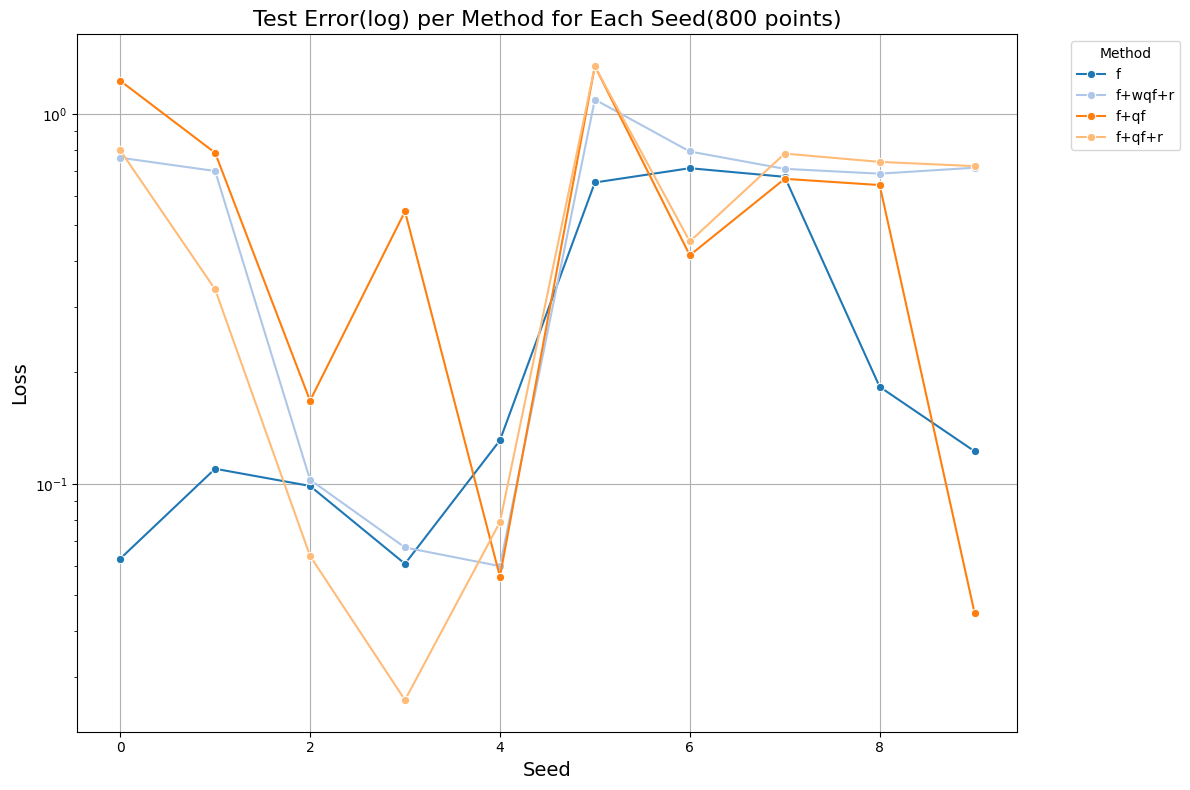

In [5]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')


# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签

plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

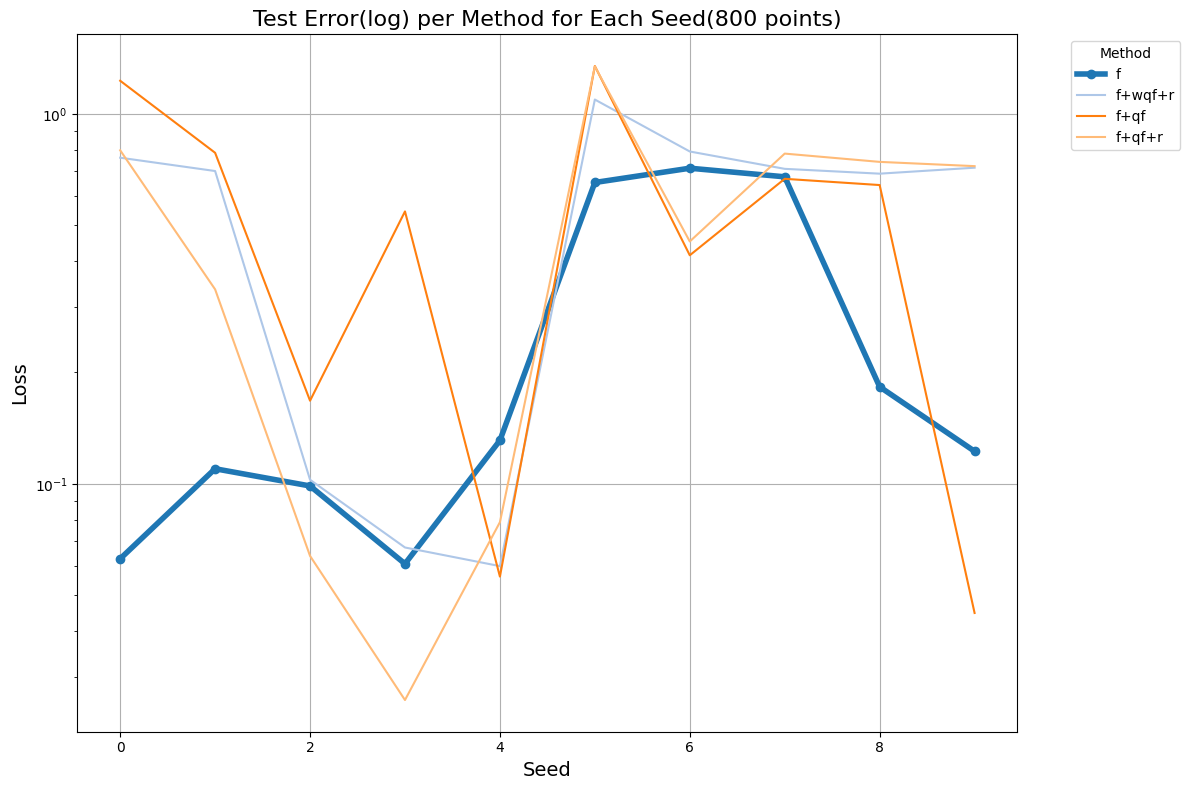

In [6]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'wqf+res','qf','f']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

c:\Users\cheny\anaconda3\envs\lcytorch\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\cheny\anaconda3\envs\lcytorch\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\cheny\anaconda3\envs\lcytorch\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\cheny\anaconda3\envs\lcytorch\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\cheny\anaconda3\envs\lcytorch\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\cheny\anaconda3\envs\lcyto

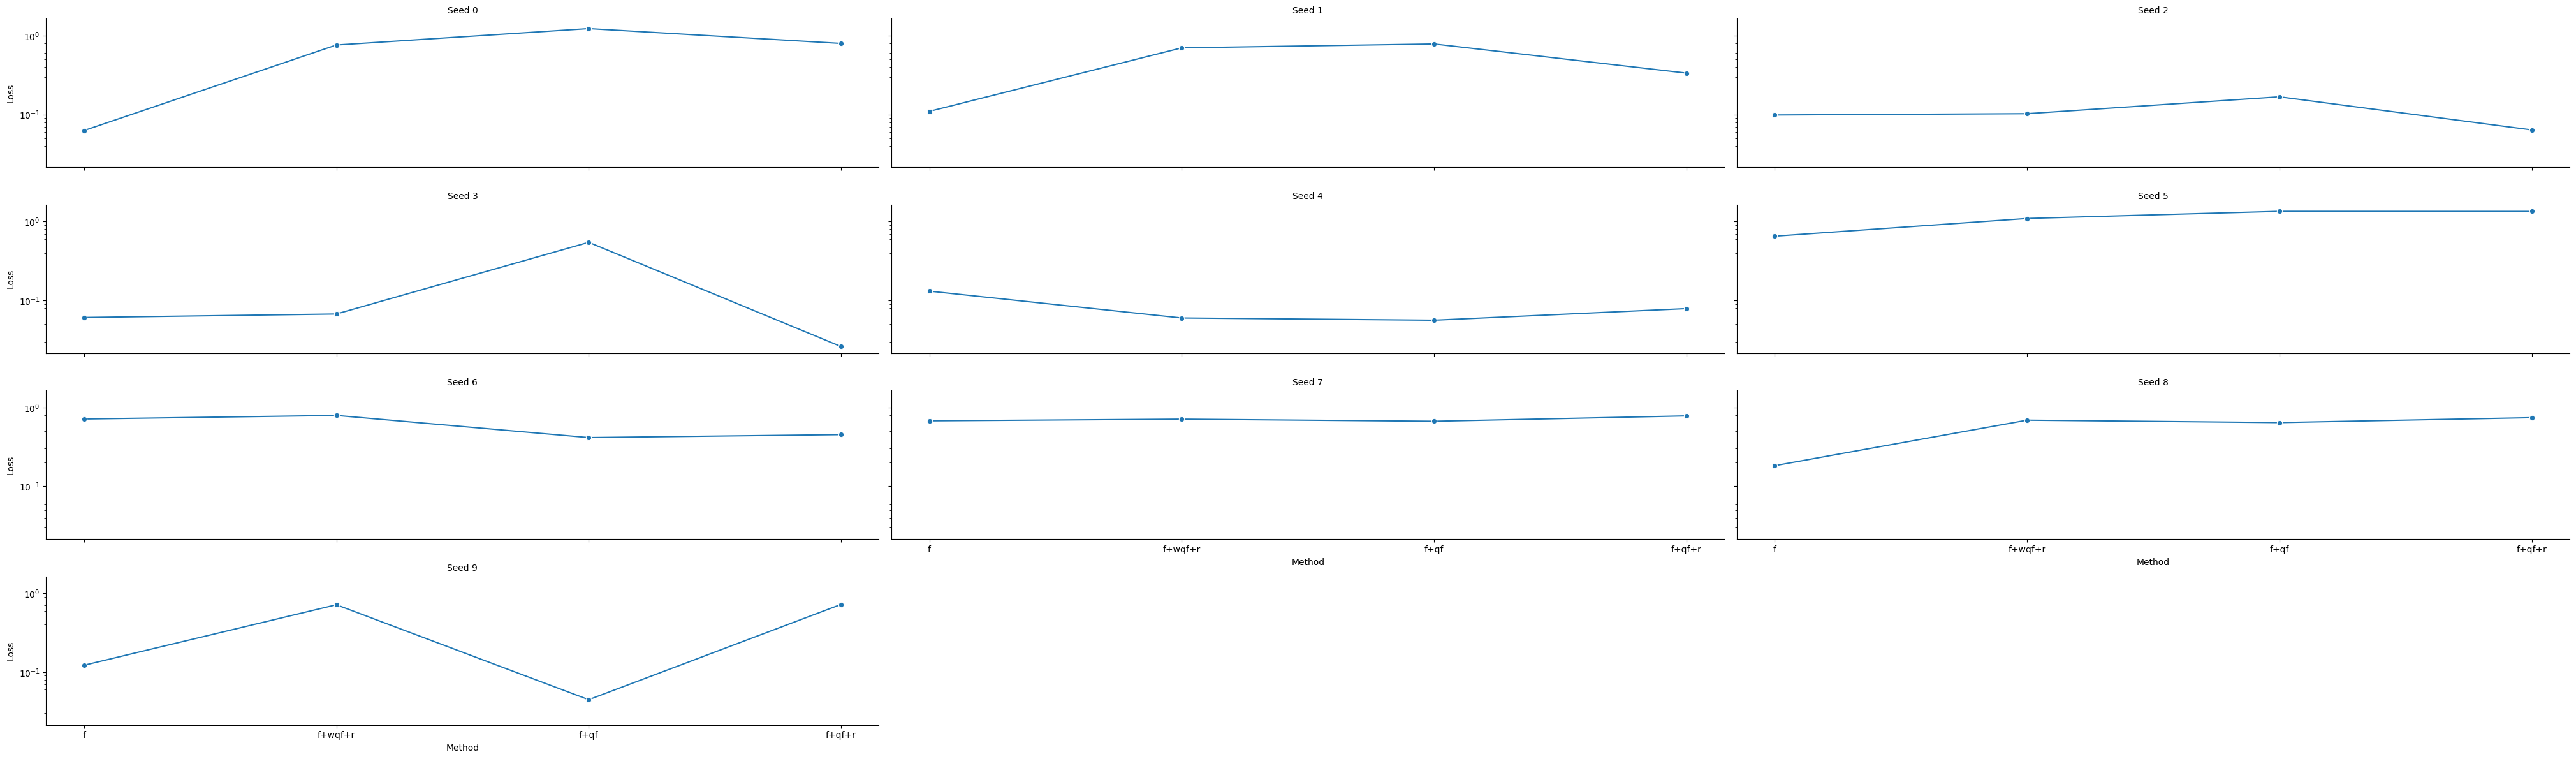

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 loss_values 是你存储所有方法和种子下的损失值的字典
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 创建 FacetGrid 来绘制每个 Seed 对应的图像
g = sns.FacetGrid(dd, col='Seed', col_wrap=3, height=3, aspect = 4.5, sharey=True)  # col_wrap 设置每行显示几幅

# 使用 lineplot 绘制每个图
g.map(sns.lineplot, 'Method', 'Loss', marker='o', palette='tab20')

# 设置纵坐标为对数尺度
g.set(yscale='log')

# 设置图形标题和标签
g.set_axis_labels('Method', 'Loss')
g.set_titles('Seed {col_name}')

# 调整图像布局
plt.tight_layout()

# 3. 显示图形
plt.show()


In [8]:
# 2. 计算每个列表的最小值
# .apply(min) 会将 min 函数应用到 'Values' 列的每一个元素（即每一个列表）
df['Min_Value'] = df['Values'].apply(min)

# 3. (可选但推荐) 创建一个透视表以便于查看
# index是行，columns是列，values是填充表格的值
result_pivot = df.pivot_table(index='Method', columns='Metric', values='Min_Value')


# --- 打印结果 ---
print("--- 包含最小值的完整列表 ---")
print(df[['Method', 'Metric', 'Min_Value']].to_string())

print("\n\n--- 整理后的透视表 (更推荐查看此表) ---")
print(result_pivot)

--- 包含最小值的完整列表 ---
     Method   Metric  Min_Value
0         f  Error_u   0.060722
1         f      MAE   0.033940
2         f      MSE   0.001840
3   f+wqf+r  Error_u   0.059850
4   f+wqf+r      MAE   0.029936
5   f+wqf+r      MSE   0.001787
6      f+qf  Error_u   0.044701
7      f+qf      MAE   0.026087
8      f+qf      MSE   0.000997
9    f+qf+r  Error_u   0.025990
10   f+qf+r      MAE   0.014565
11   f+qf+r      MSE   0.000337


--- 整理后的透视表 (更推荐查看此表) ---
Metric    Error_u       MAE       MSE
Method                               
f        0.060722  0.033940  0.001840
f+qf     0.044701  0.026087  0.000997
f+qf+r   0.025990  0.014565  0.000337
f+wqf+r  0.059850  0.029936  0.001787


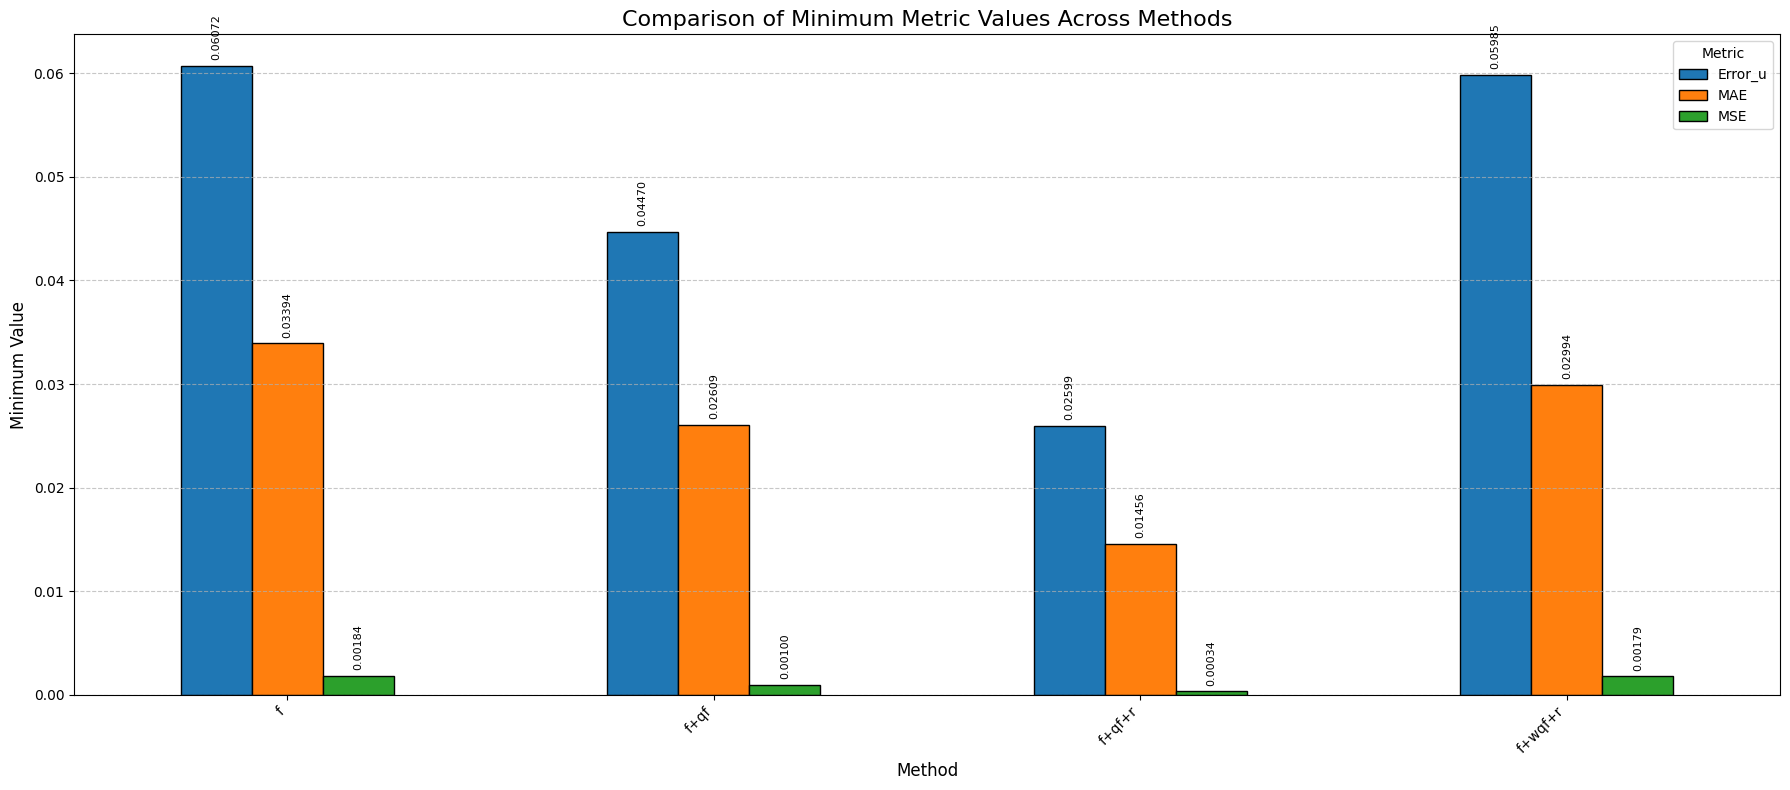

In [9]:
df['Min_Value'] = df['Values'].apply(min)
result_pivot = df.pivot_table(index='Method', columns='Metric', values='Min_Value')

# --- 2. 绘制分组条形图 ---
ax = result_pivot.plot(
    kind='bar', 
    figsize=(18, 8), # 设置图像大小
    edgecolor='black' # 给条形加上黑色边框，更清晰
)

# --- 3. 美化图表 ---
plt.title('Comparison of Minimum Metric Values Across Methods', fontsize=16) # 标题
plt.ylabel('Minimum Value', fontsize=12) # Y轴标签
plt.xlabel('Method', fontsize=12) # X轴标签
plt.xticks(rotation=45, ha='right') # X轴的标签旋转45度，防止重叠
plt.grid(axis='y', linestyle='--', alpha=0.7) # 添加水平网格线
plt.legend(title='Metric') # 显示图例

# 在每个条形图上显示数值
for container in ax.containers:
    ax.bar_label(container, fmt='%.5f', fontsize=8, rotation=90, padding=4)

plt.tight_layout() # 调整布局，防止标签被裁切
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_16848\959944533.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_16848\959944533.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


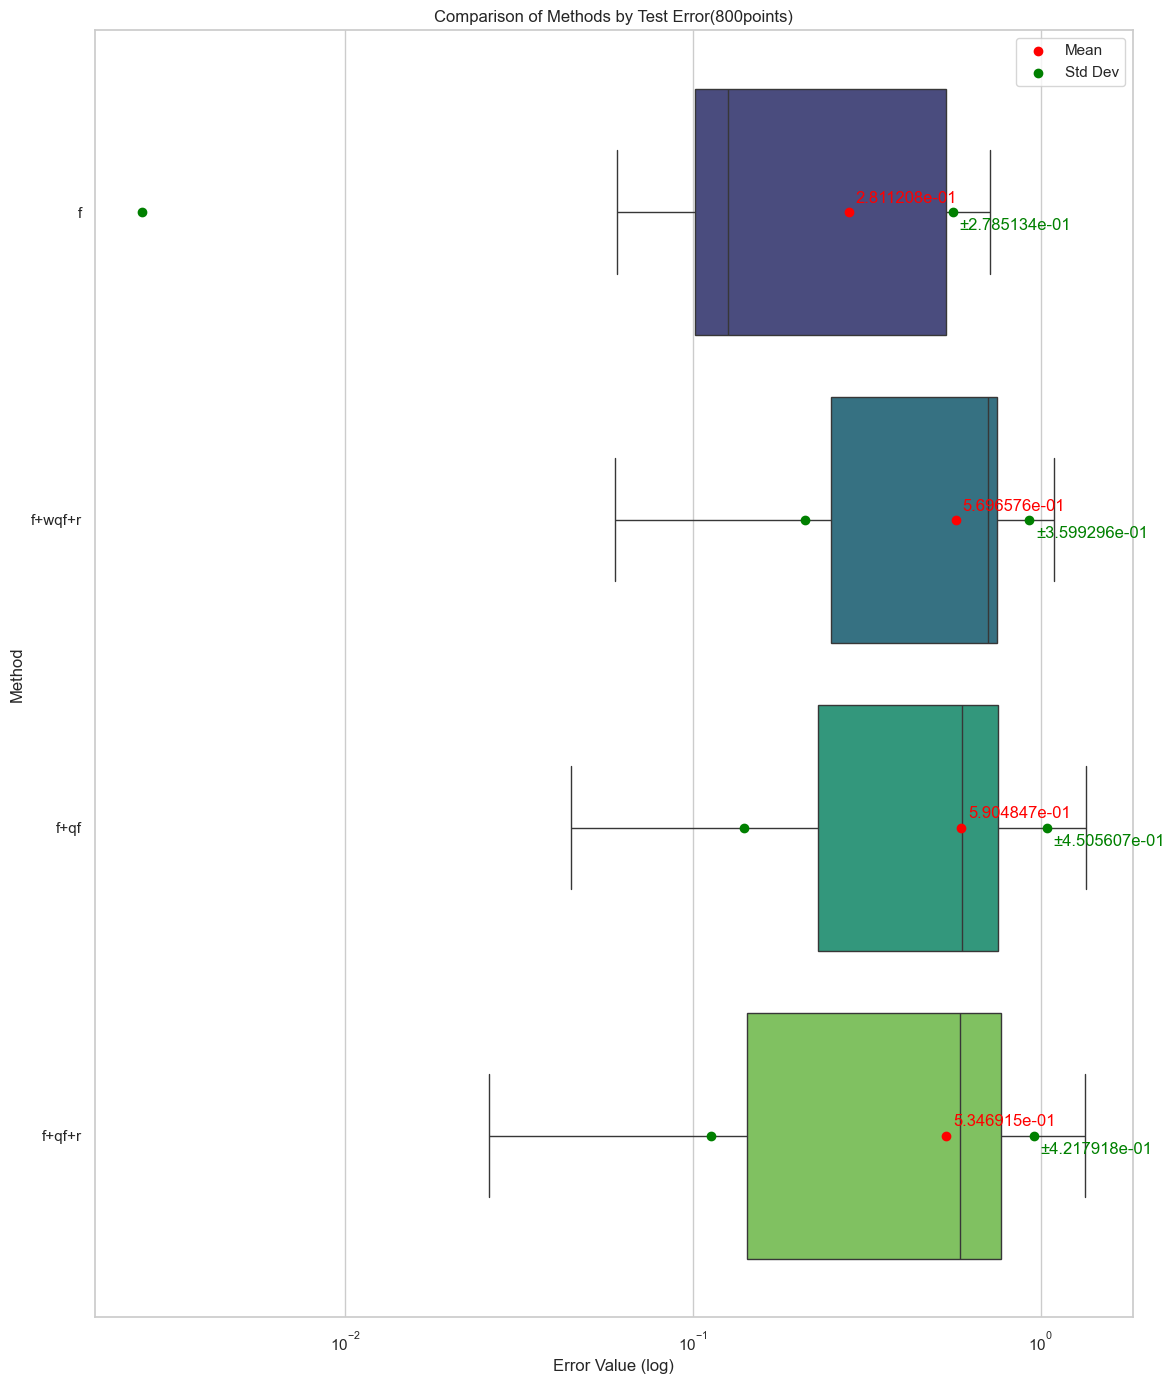

In [10]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 14))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [11]:
(2.70e-03-2.47e-03)/2.70e-03

0.08518518518518524

C:\Users\cheny\AppData\Local\Temp\ipykernel_16848\592110665.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_16848\592110665.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


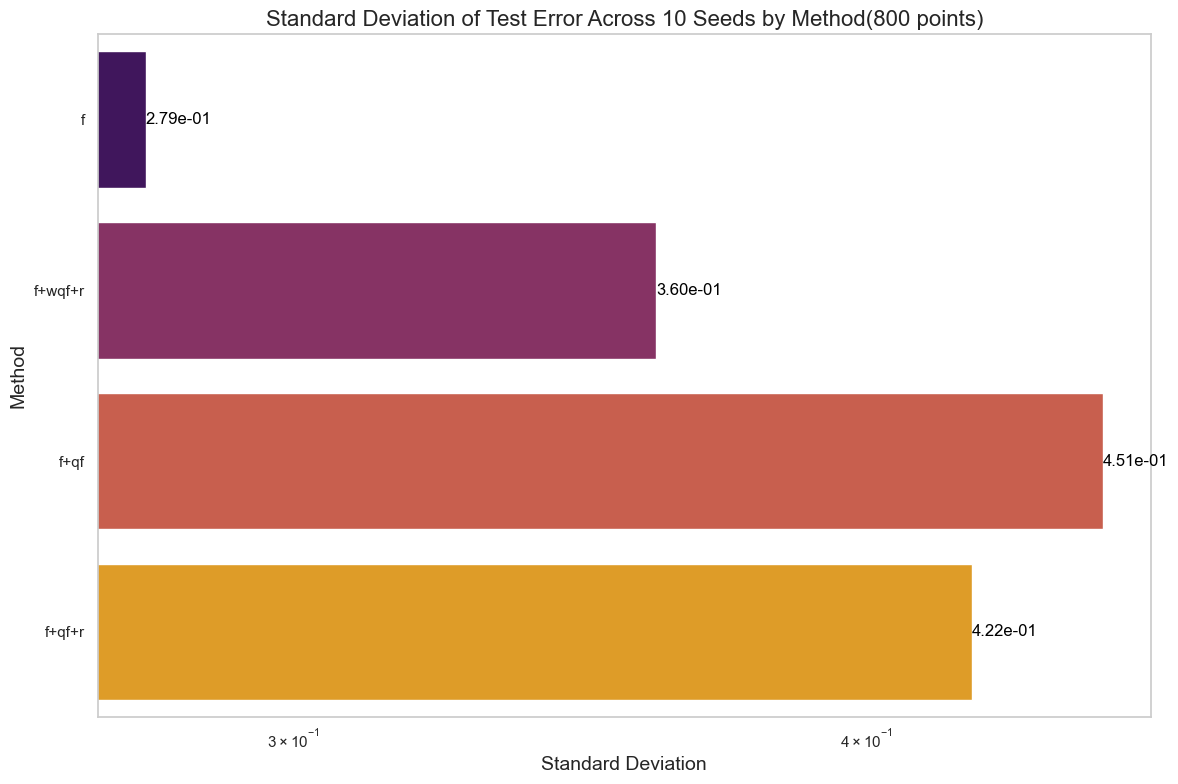

In [12]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.000001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

In [13]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['f', 'f+wqf+r', 'f+qf', 'f+qf+r']
Seeds: range(0, 10)
Loss Values: {'f': [0.0358180229201927, 0.05585966593141555, 0.057468795166968616, 0.03393991953036893, 0.0766683877644389, 0.3625437882391885, 0.4031235496664109, 0.37765864852734254, 0.1114171397223775, 0.06272457185165352], 'f+wqf+r': [0.435698130286637, 0.3928897328369974, 0.05427282396700194, 0.038451997567754734, 0.029935740827384337, 0.6665089417623925, 0.4585867731490909, 0.398513131931809, 0.38684287719184474, 0.4028244781331054], 'f+qf': [0.7087100349489281, 0.4528895524096479, 0.1005434045385732, 0.2541834834949924, 0.032692583880322784, 0.7589300134700523, 0.22504678465885594, 0.36554076059793655, 0.3608424953493993, 0.0260866799776284], 'f+qf+r': [0.46380358152537743, 0.18919618851925332, 0.03757601585895244, 0.014564904374501067, 0.045219872764570714, 0.7572056171343383, 0.25265613008564897, 0.45026413299317025, 0.4221756772361777, 0.4082953017548556]}


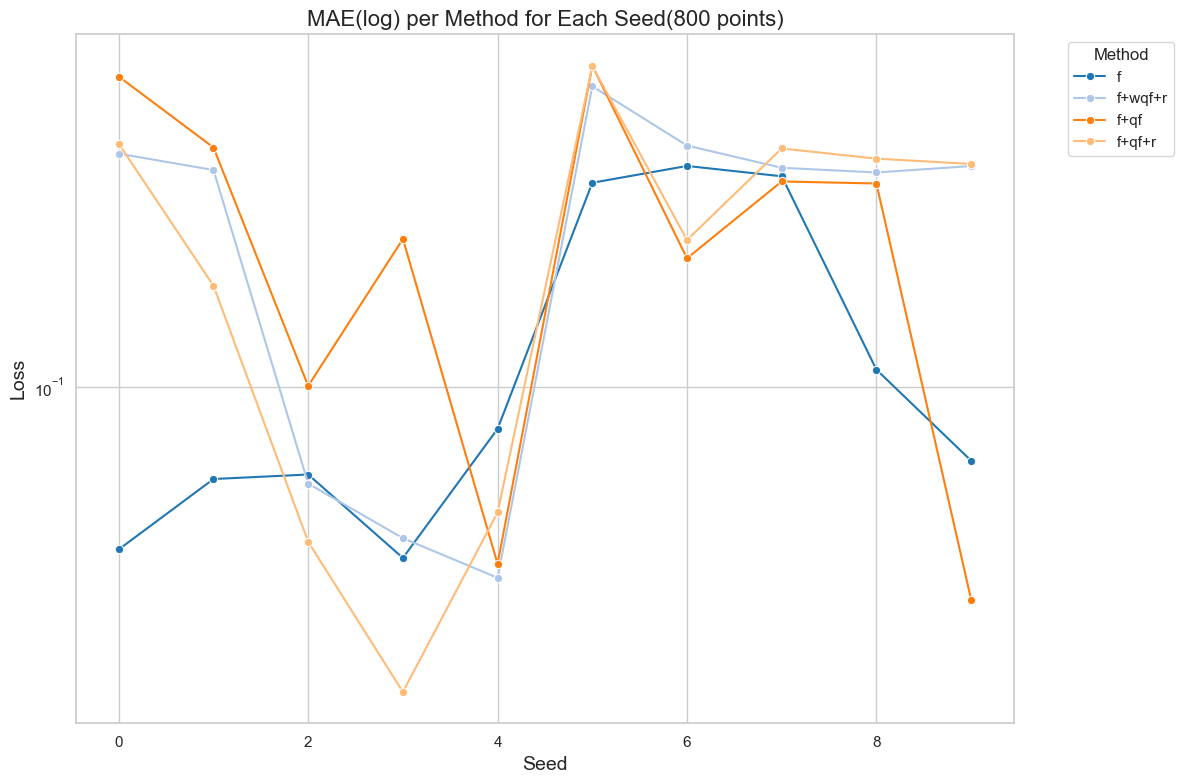

In [14]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)



# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

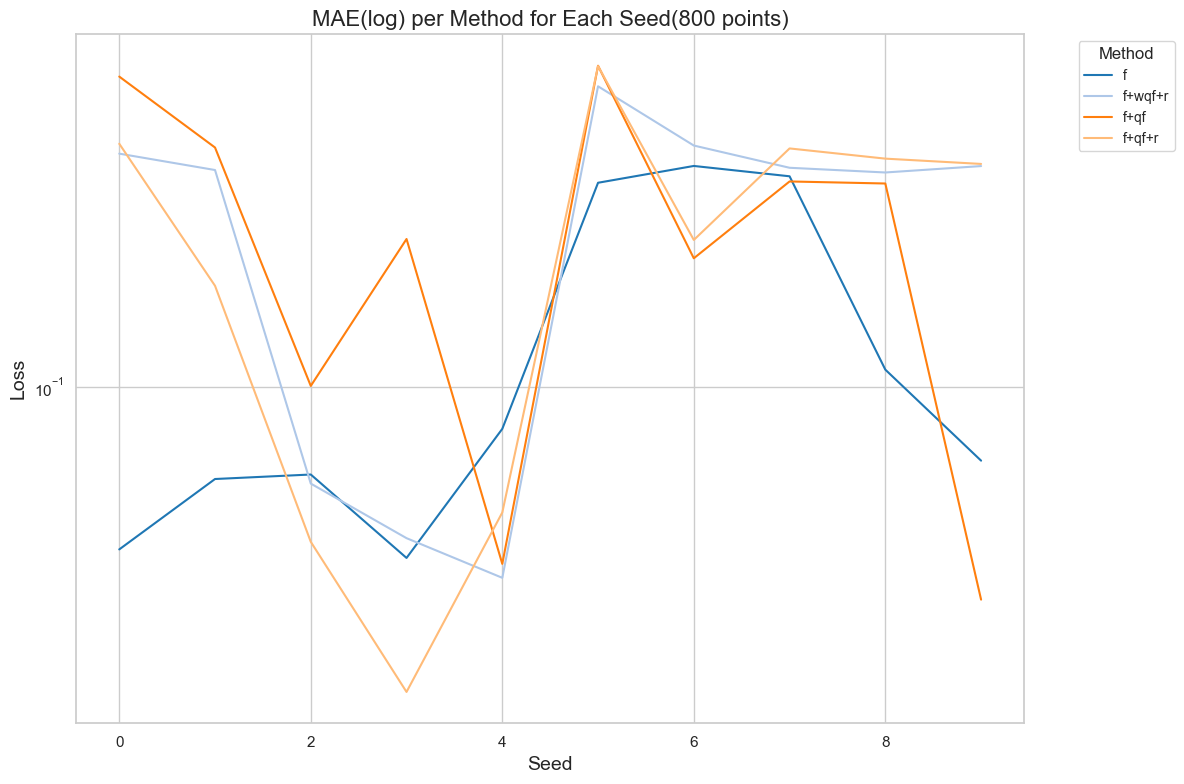

In [15]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_16848\822122591.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_16848\822122591.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


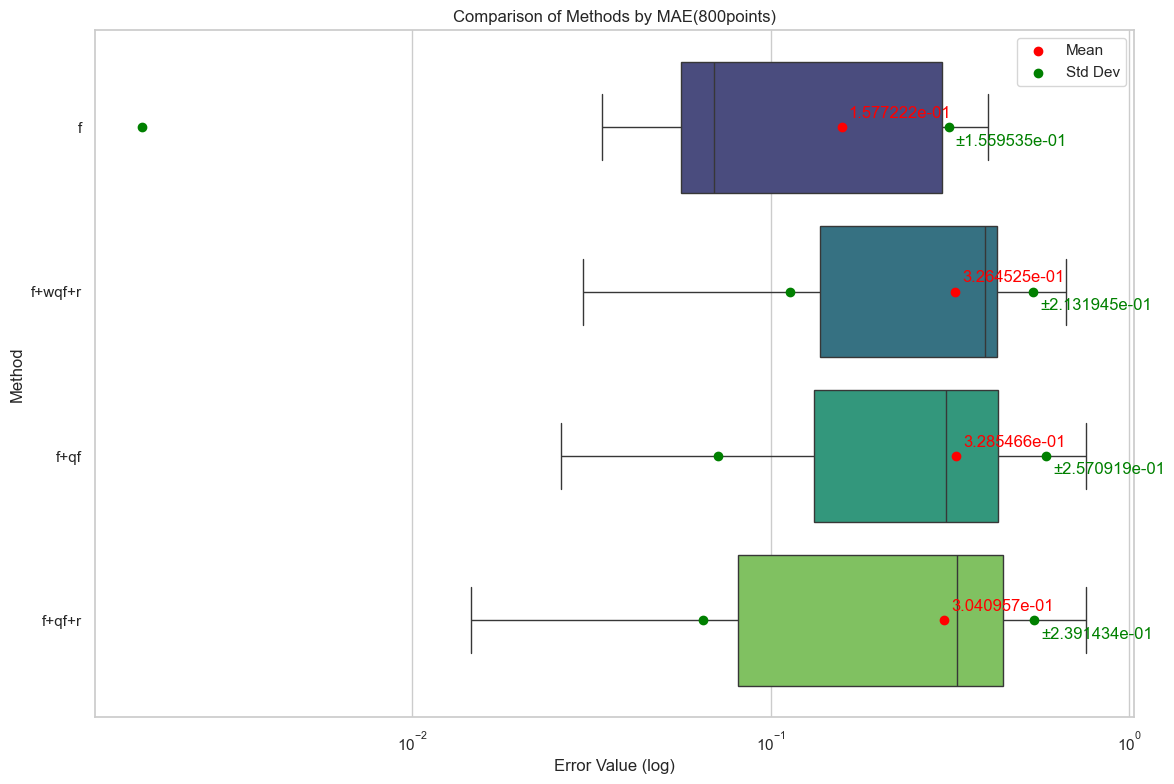

In [16]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_16848\2556958130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_16848\2556958130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


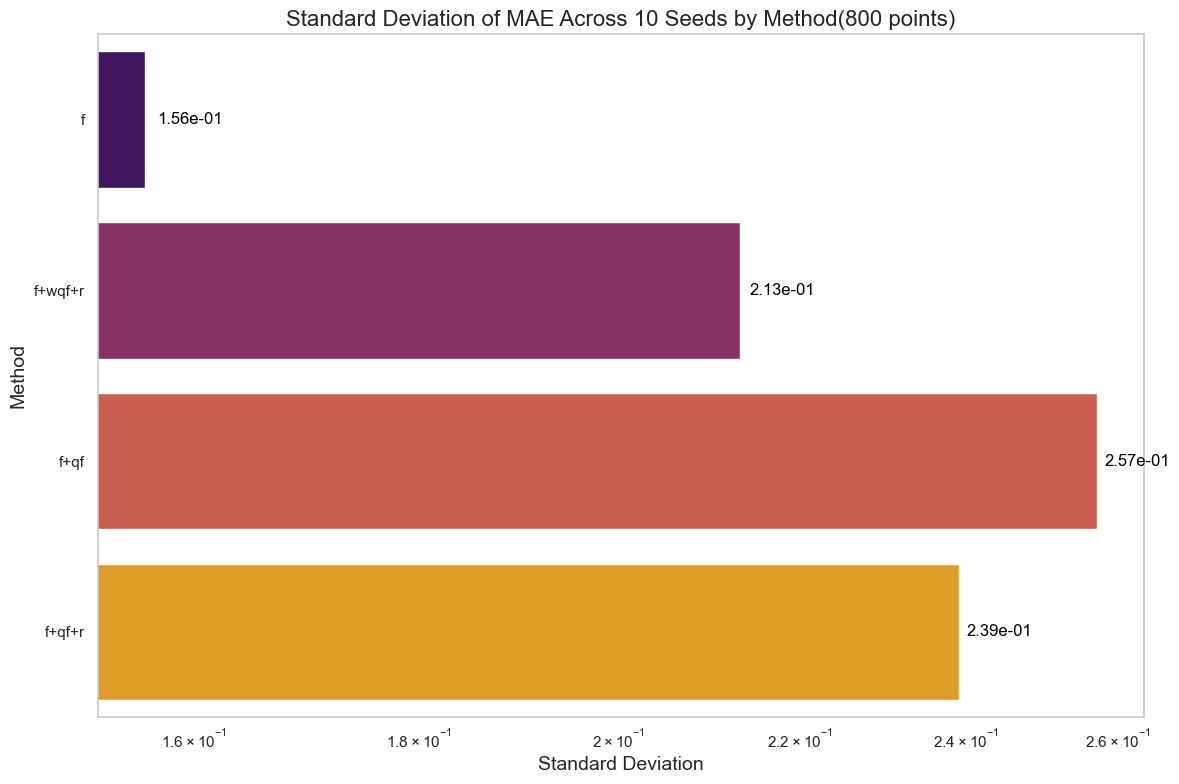

In [17]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

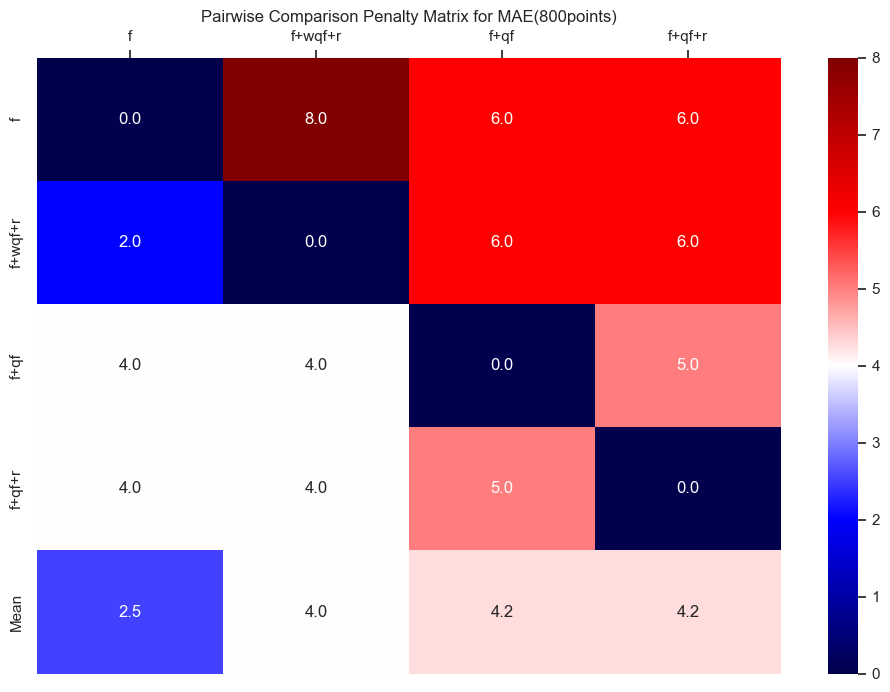

In [18]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [19]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['f', 'f+wqf+r', 'f+qf', 'f+qf+r']
Seeds: range(0, 10)
Loss Values: {'f': [0.0019588549618540186, 0.006011512967294769, 0.004851651804996078, 0.0018396154588122232, 0.008558604313964702, 0.21272480320911183, 0.2541798967318647, 0.22832875965336086, 0.016687752803359542, 0.007472045933228773], 'f+wqf+r': [0.2897298785080109, 0.24540693899615537, 0.005241673724880743, 0.0022541708338071754, 0.001787147585433265, 0.597935241775702, 0.31301055644849746, 0.25217106160133773, 0.2374608307304201, 0.2557963973090399], 'f+qf': [0.7557995400200299, 0.307971496349841, 0.014036434216062075, 0.14835674604578578, 0.001568696874553461, 0.9077841424803708, 0.08590680597475148, 0.22270035183403392, 0.20606807416283918, 0.000996937130125767], 'f+qf+r': [0.3177602945185263, 0.05618306141897597, 0.0020289373086226003, 0.00033702605164253946, 0.003089755447236257, 0.9030893204219622, 0.10203885501749574, 0.30491052178525396, 0.2750214458746956, 0.2608240927460402]}


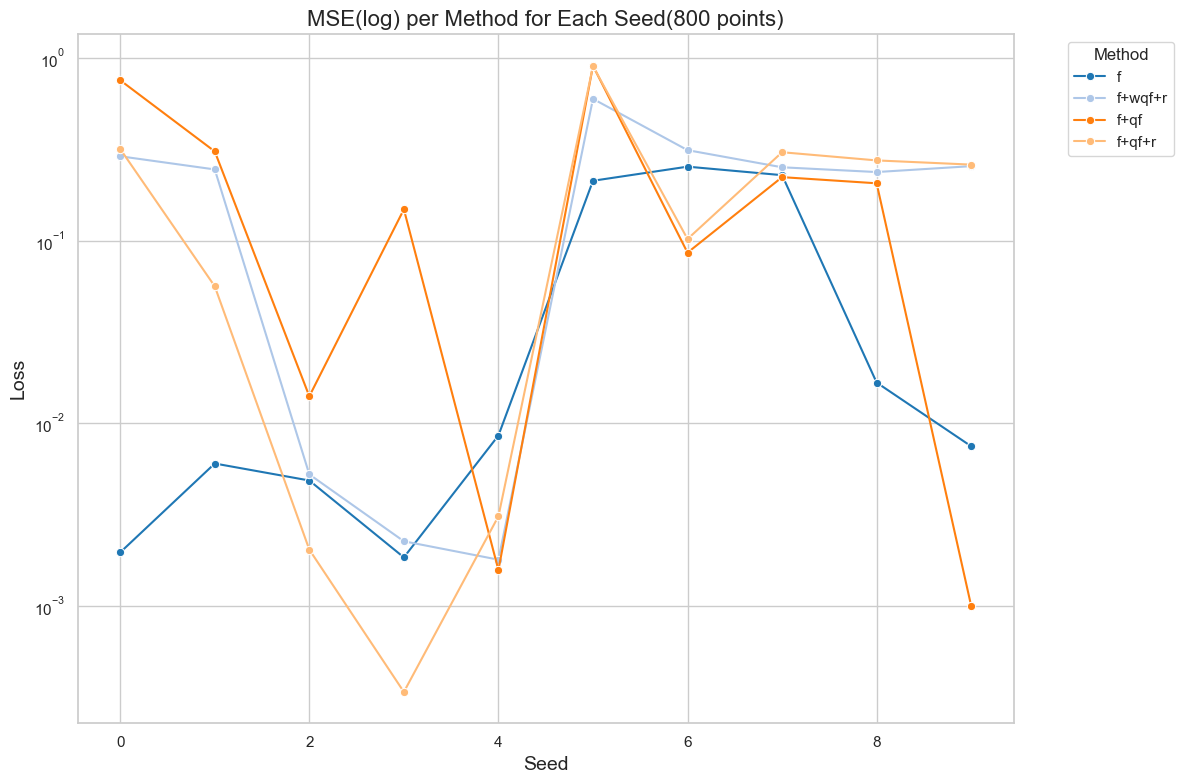

In [20]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')



# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

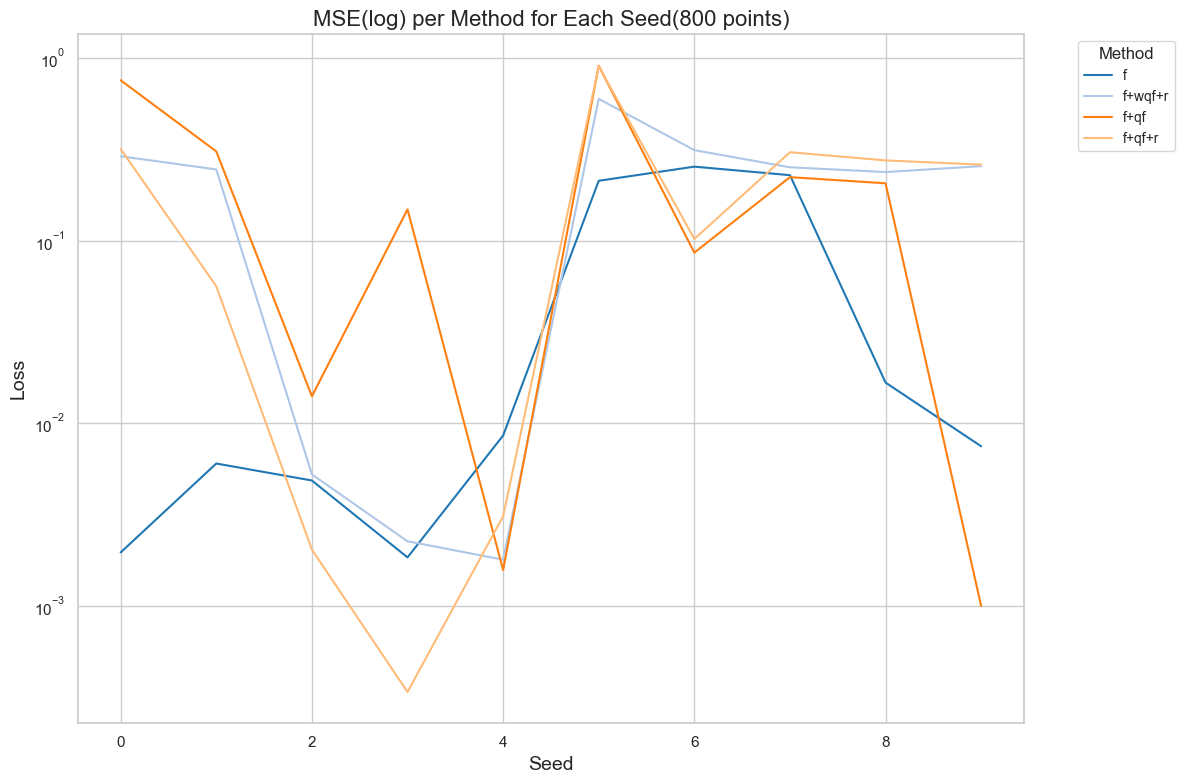

In [21]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_16848\2163168095.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_16848\2163168095.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


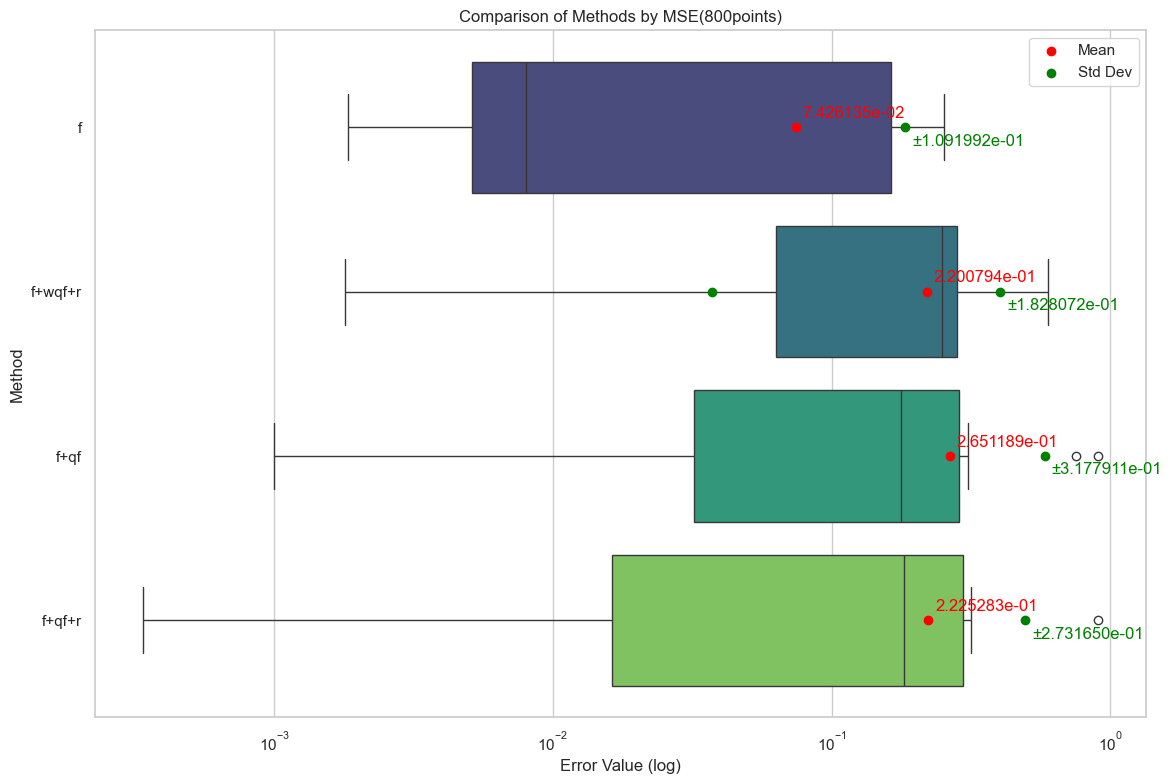

In [22]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [23]:
np.sqrt(2.889226e-06)

0.0016997723376970223